# **Partial Dependence Plots**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Shale Gas Wells.csv to Shale Gas Wells.csv


Test R2 score: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


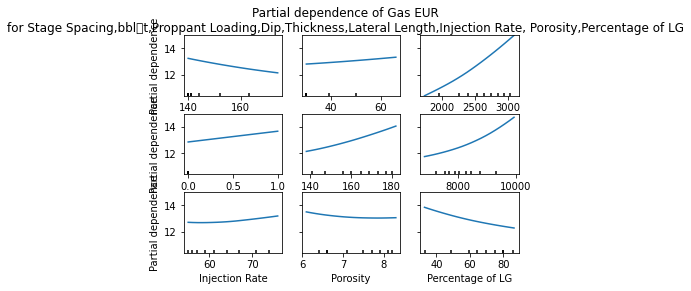

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
dataset=pd.read_csv('Shale Gas Wells.csv')
X=dataset.iloc[:,0:13]
y=dataset.iloc[:,13].values
seed=15
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size
=0.25)
model=make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes=(25,25),
                                 learning_rate_init=0.01,
                                 early_stopping=True,max_iter=500))
model.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(model.score(X_test, y_test)))
features=['Stage Spacing','bbl/ft','Proppant Loading','Dip',
'Thickness','Lateral Length','Injection Rate','Porosity',
'Percentage of LG']

plot_partial_dependence(model,X, features,
                        n_jobs=3, grid_resolution=20)
fig = plt.gcf()

fig.suptitle('Partial dependence of Gas EUR\n' 'for Stage Spacing,bbl\ft,Proppant Loading,Dip,Thickness,Lateral Length,Injection Rate, Porosity,Percentage of LG')

 
fig.subplots_adjust(hspace=0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'Gas EUR vs. Lateral Length and Proppant Loading')

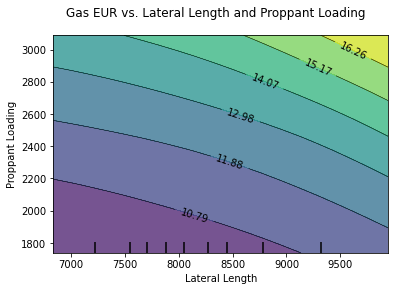

In [3]:
features_LLPL=[('Lateral Length','Proppant Loading')]
plot_partial_dependence(model,X, features_LLPL, n_jobs=3, 
grid_resolution=20)
fig=plt.gcf()
fig.suptitle('Gas EUR vs. Lateral Length and Proppant Loading')

/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_partial_dependence.py:523: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


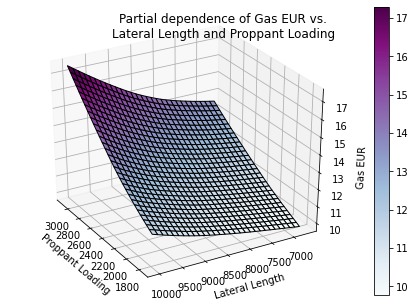

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
features1=('Proppant Loading', 'Lateral Length')
pdp, axes=partial_dependence(model, X_train, features=features1,
grid_resolution=30)
XX, YY=np.meshgrid(axes[0], axes[1])
Z=pdp[0].T
ax=Axes3D(fig)
surf=ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.
BuPu, edgecolor='k0')
ax.set_xlabel(features1[0])
ax.set_ylabel(features1[1])
ax.set_zlabel('Gas EUR')
ax.view_init(elev=30, azim=150)
plt.colorbar(surf)
plt.suptitle('Partial dependence of Gas EUR vs.\n' 'Lateral Length and Proppant Loading')

plt.subplots_adjust(top=1)
plt.show()